In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from tqdm import tqdm

from utils import *

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import seaborn as sns

In [2]:
torch.manual_seed(42)

# Initialize AND network 
model = AND_net(in_size=2, out_size=1, bias=True)

# Train network
input_statistics = {'OR1':0,
                    'OR2':0,
                    'AND':0,
                    'zero':1}
all_patterns, all_targets = generate_imbalanced_data(input_statistics)

num_epochs = 100
lr = 0.1

all_patterns, output_history, loss_history, weight_history, bias_history = model.train(lr, num_epochs, all_patterns, all_targets)


tensor([[0.1923, 0.0842]])


100%|██████████| 100/100 [00:00<00:00, 4930.53it/s]


<ipython-input-3-0a64c82dc1ae>:6: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax[axis].set_ylim([0,np.max(loss_history)])


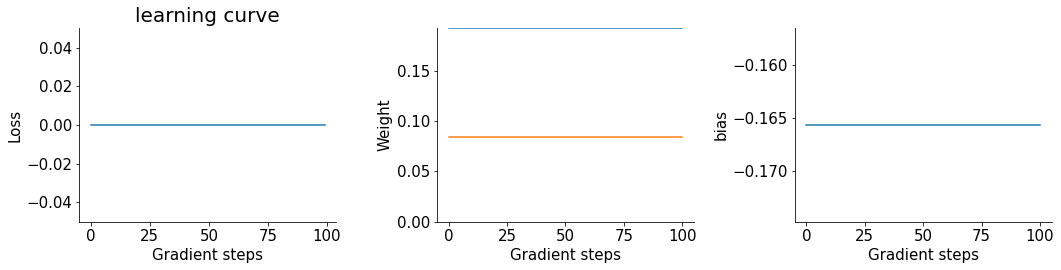

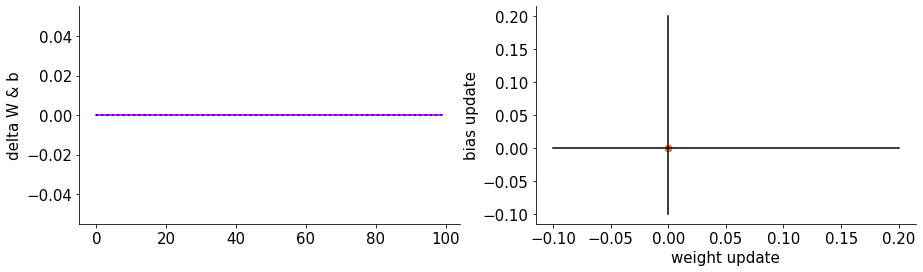

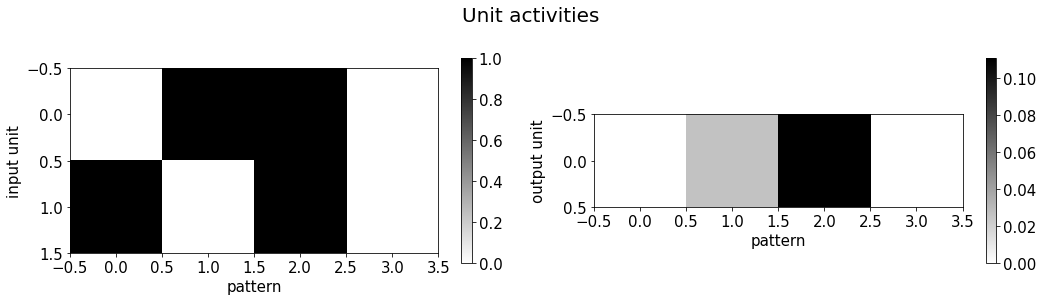

In [3]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
axis = 0
ax[axis].plot(loss_history)
ax[axis].set_xlabel('Gradient steps')
ax[axis].set_ylabel('Loss')
ax[axis].set_ylim([0,np.max(loss_history)])
ax[axis].set_title('learning curve',fontsize=20)

axis = 1
ax[axis].plot(weight_history)
ax[axis].set_xlabel('Gradient steps')
ax[axis].set_ylabel('Weight')
ax[axis].set_ylim([0,torch.max(weight_history)])

axis = 2
ax[axis].plot(bias_history)
ax[axis].set_xlabel('Gradient steps')
ax[axis].set_ylabel('bias')
sns.despine()
plt.tight_layout()

fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(torch.diff(weight_history[:,0]),color='red')
ax[0].plot(torch.diff(weight_history[:,1]),color='magenta')
ax[0].plot(torch.diff(bias_history),':',linewidth=2,color='blue')
ax[0].set_ylabel('delta W & b')

ax[1].scatter(torch.diff(weight_history[:,0]),torch.diff(bias_history))
ax[1].scatter(torch.diff(weight_history[:,1]),torch.diff(bias_history))
ax[1].plot([0,0],[-0.1,0.2],color='k')
ax[1].plot([-0.1,0.2],[0,0],color='k')
ax[1].set_xlabel('weight update')
ax[1].set_ylabel('bias update')
sns.despine()
plt.show()


fig, ax = plt.subplots(1,2,figsize=(15,4))
all_patterns = torch.tensor([[0., 1.],[1., 0.],[1., 1.],[0., 0.]])
axis = 0
im = ax[axis].imshow(all_patterns.T,aspect='equal',cmap='gray_r')
plt.colorbar(im, ax=ax[axis])
ax[axis].set_xlabel('pattern')
ax[axis].set_ylabel('input unit')

axis = 1
im = ax[axis].imshow(model(all_patterns).detach().unsqueeze(0),aspect='equal',vmin=0,cmap='gray_r')
plt.colorbar(im, ax=ax[axis])
ax[axis].set_xlabel('pattern')
ax[axis].set_ylabel('output unit')

plt.suptitle("Unit activities",fontsize=20)
plt.tight_layout()
plt.show()